In [8]:
from database import FlowDoc, VectorDB
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import joblib
import random

In [9]:
vec_dict = joblib.load('./data/vec_dict.joblib')
db = VectorDB()
db.fill_db()

WARNING - docarray - Index file does not exist: C:\Users\vadim_jfdr\OneDrive\Документы\test_tasks\AcademyofCompTechandDes\test_task\workspace_path\InMemoryExactNNIndexer[FlowDoc][FlowDocWithMatchesAndScores]/index.bin. Initializing empty InMemoryExactNNIndex.


In [10]:
five_flowers = random.sample(vec_dict.items(), 5)

In [11]:
five_queries = [FlowDoc(text=text[0], embedding=vec[0]) for text, vec in five_flowers]

In [12]:
thirty_similars = [db.find_sims(query) for query in five_queries]

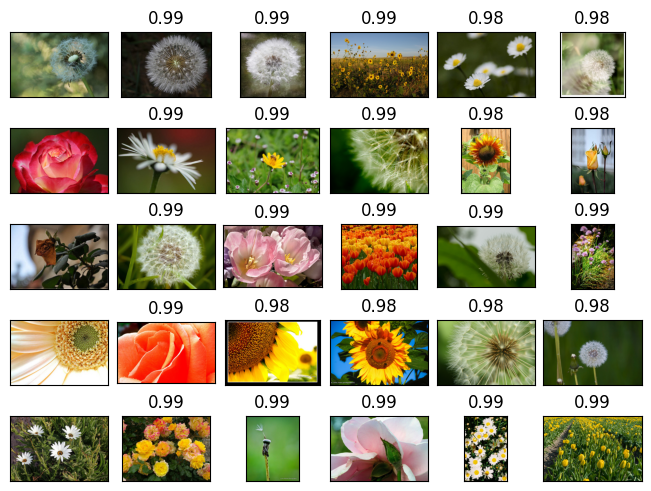

In [14]:
fig, axs = plt.subplots(5, 6, layout='constrained')
for i in range(5):
    for j in range(6):
        img = mpimg.imread(thirty_similars[i][0].matches[j].text)
        axs[i, j].imshow(img)
        axs[i, j].set_yticks([])
        axs[i, j].set_xticks([])
        if j != 0:
            axs[i, j].set_title("{conf:.2f}".format(conf=thirty_similars[i][0].scores[j]))